# **KNN and SVC**

Import the necessary packages /modules and read the data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC

%matplotlib inline

In [ ]:
df=pd.read_csv('/content/dataset4')

In [ ]:
df.head(10)

,Unnamed: 0,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,...,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,4,no,Equal,Moderate,Normal,NaN,no,yes,05-Dec,05-Dec,...,Oligaemic,Fallot,no,4-10_days,no,None,Mild,NaN,Low,yes
1,28,no,Equal,Severe,Normal,Normal,no,no,<5,<5,...,Normal,TGA,no,0-3_days,no,None,Complete,Normal,Low,yes
2,19,no,Equal,Mild,Normal,Oligaemic,no,no,05-Dec,<5,...,Normal,PAIVS,no,0-3_days,no,None,Complete,Normal,Low,yes
3,3,no,Equal,Moderate,Normal,NaN,no,no,<5,<5,...,Grd_Glass,TGA,no,0-3_days,no,None,Complete,Normal,Low,yes
4,0,no,Equal,Moderate,Normal,Normal,no,yes,05-Dec,05-Dec,...,Asy/Patchy,TGA,no,0-3_days,no,None,Complete,Normal,Normal,yes
5,18,no,Equal,Moderate,Normal,Asy/Patch,no,no,<5,05-Dec,...,Oligaemic,PAIVS,no,0-3_days,no,Lt_to_Rt,Complete,Abnormal,Low,yes
6,12,no,Equal,Severe,Normal,Grd_Glass,no,no,05-Dec,<5,...,Grd_Glass,Fallot,no,0-3_days,no,None,Transp.,Normal,Low,yes
7,24,no,Equal,Severe,Normal,Asy/Patch,no,no,12+,<5,...,Oligaemic,TGA,no,0-3_days,no,Lt_to_Rt,Complete,Normal,Low,yes
8,19,no,Equal,Severe,High,NaN,no,no,<5,<5,...,Normal,TGA,yes,0-3_days,no,None,Complete,Normal,Low,yes
9,22,no,Equal,Severe,Normal,Plethoric,no,no,<5,<5,...,Grd_Glass,TGA,no,0-3_days,no,None,Complete,Normal,Low,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5000 non-null   int64 
 1   BirthAsphyxia   5000 non-null   object
 2   HypDistrib      5000 non-null   object
 3   HypoxiaInO2     5000 non-null   object
 4   CO2             5000 non-null   object
 5   ChestXray       4654 non-null   object
 6   Grunting        5000 non-null   object
 7   LVHreport       4677 non-null   object
 8   LowerBodyO2     5000 non-null   object
 9   RUQO2           5000 non-null   object
 10  CO2Report       5000 non-null   object
 11  XrayReport      5000 non-null   object
 12  Disease         5000 non-null   object
 13  GruntingReport  5000 non-null   object
 14  Age             5000 non-null   object
 15  LVH             5000 non-null   object
 16  DuctFlow        5000 non-null   object
 17  CardiacMixing   5000 non-null   object
 18  LungPare

# **Part I - Preprocessing**

1. Null Values

In [ ]:
for i in df.columns:
  print(i, ' - ', df[i].isna().sum())

Unnamed: 0  -  0
BirthAsphyxia  -  0
HypDistrib  -  0
HypoxiaInO2  -  0
CO2  -  0
ChestXray  -  346
Grunting  -  0
LVHreport  -  323
LowerBodyO2  -  0
RUQO2  -  0
CO2Report  -  0
XrayReport  -  0
Disease  -  0
GruntingReport  -  0
Age  -  0
LVH  -  0
DuctFlow  -  0
CardiacMixing  -  0
LungParench  -  745
LungFlow  -  0
Sick  -  0


In [ ]:
#Since all of these are categorical. We use mode
df['ChestXray'].fillna(df['ChestXray'].mode()[0], inplace=True)
df['LVHreport'].fillna(df['LVHreport'].mode()[0], inplace=True)
df['LungParench'].fillna(df['LungParench'].mode()[0], inplace=True)

In [ ]:
for i in df.columns:
  print(i, ' - ', df[i].isna().sum())

Unnamed: 0  -  0
BirthAsphyxia  -  0
HypDistrib  -  0
HypoxiaInO2  -  0
CO2  -  0
ChestXray  -  0
Grunting  -  0
LVHreport  -  0
LowerBodyO2  -  0
RUQO2  -  0
CO2Report  -  0
XrayReport  -  0
Disease  -  0
GruntingReport  -  0
Age  -  0
LVH  -  0
DuctFlow  -  0
CardiacMixing  -  0
LungParench  -  0
LungFlow  -  0
Sick  -  0


2. Normal in ChestXray but fall in sick

In [ ]:
df2=df[(df['ChestXray'] == 'Normal') & (df['Sick'] == 'yes')]
print('Patients who have Normal in ChestXray but fall in sick = ', df2.count()[0])

Patients who have Normal in ChestXray but fall in sick =  587


3. Visualize the relation between LungParench and Disease

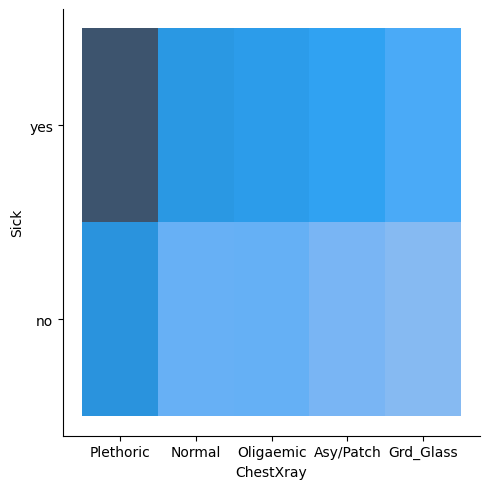

In [ ]:
sns.displot(x='ChestXray', y='Sick', data=df)

# **Part II - Model Building**

1. Problem Statement



>> To predict whether the patient is sick or not



2. Build Model

In [ ]:
#drop useless unamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Convert to numeric data
le = LabelEncoder()
for i in df.columns:
  df[i] = le.fit_transform(df[i])

In [ ]:
#Split data
X = df.drop('Sick', axis=1).copy()
y = df['Sick'].copy()

In [ ]:
#train model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
    ('robust_scaler', RobustScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Metrics

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_accuracy)

Accuracy: 0.594


# **Part III - Model Comparison**

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
svc = SVC(kernel='rbf', gamma=0.5, C=0.1)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=0.5)

In [ ]:
y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', svc_accuracy)

Accuracy: 0.66425


In [ ]:
print_score(knn, X_train, y_train, X_test, y_test)
print_score(svc, X_train, y_train, X_test, y_test)

Accuracy Score: 59.40%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.359640     0.672224     0.594     0.515932      0.567274
recall        0.268057     0.758750     0.594     0.513404      0.594000
f1-score      0.307167     0.712871     0.594     0.510019      0.576656
support    1343.000000  2657.000000     0.594  4000.000000   4000.000000
Confusion Matrix: 
 [[ 360  983]
 [ 641 2016]]

Accuracy Score: 66.42%
CLASSIFICATION REPORT:
                0            1  accuracy    macro avg  weighted avg
precision     0.0     0.664250   0.66425     0.332125      0.441228
recall        0.0     1.000000   0.66425     0.500000      0.664250
f1-score      0.0     0.798257   0.66425     0.399129      0.530243
support    1343.0  2657.000000   0.66425  4000.000000   4000.000000
Confusion Matrix: 
 [[   0 1343]
 [   0 2657]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Part - IV The better model**
## **Judging by the metrics it is SVC with radial kernel**